<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Numerical methods: 3. Roots
## Bracketing
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we learn how to bracket possible roots for a function $f(x)$ with one variable $x$,
defined over the interval $[a,b]$.

We first import some libraries...

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Function
Next, we define the function, which we would like to examine:

In [2]:
def root_f(x):
    y = np.sin(x)
    return y

## Bracketing algorithm
Next, we define the **bracketing algorithm** as a function.
1. We first need to define two arrays, $xb1$ and $xb1$, which will hold start- und end points of the
sub-intervals, where a sign change occurs for $f$.
2. We then define the stepsize $dx$, controlled by the number of sub-intervals $n$.
3. We then start at the left side of the first sub-interval with $a$ as argument and $f(a)$ as value.
4. Finally, we iterative over all sub-intervals and search for sign changes of $f$.
5. If a sign change of $f$ occurs, we store the left and right side of the sub-interval in out arrays.

In [3]:
def root_bracket (f,a,b,n):
    '''
    #-----------------------------------------------------------------------
    # Given a function fx defined on the intervall [a,b], subdivide the
    # intervall in n equally spaced segments, and search for zero crossings
    # of the function. nb is input as the maximum number of roots searched,
    # it is reset to the number of bracketing pairs found, xb1(1:nb),xb2(1:nb).
    # (c) Numerical recipes 
    #-----------------------------------------------------------------------
    '''
    nb  = 0
    xb1 = np.zeros([0])
    xb2 = np.zeros([0])
    x   = a
    dx  = (b-a)/n
    fa  = f(x)
    for i in np.linspace(1,n,n,dtype=int):
        x = x + dx
        fb = f(x)
        if (fa*fb <= 0):
            nb = nb + 1
            xb1 = np.append(xb1,x-dx)
            xb2 = np.append(xb2,x)
        fa = fb
    return xb1,xb2,nb 

## Test the algorithm
Next, we test our **bracketing algorithm** with the function $f(x)=\sin(x)$, given in the interval $[0,2\pi]$:

In [4]:
#-----------------------------------------------------------------------
# define interval and number of segments
#-----------------------------------------------------------------------
a   = -0.1
b   = 2.1*np.pi
n   = 10
nb  = 0
#-----------------------------------------------------------------------
# call bracketing algorithm
#-----------------------------------------------------------------------
[xb1,xb2,nb] = root_bracket(root_f,a,b,n)

In [5]:
print ('nb: ',nb)
for i in range(nb):
    print("%s %10.2f %10.2f" % ('xb1 xb2:',xb1[i],xb2[i]))

nb:  3
xb1 xb2:      -0.10       0.57
xb1 xb2:       2.58       3.25
xb1 xb2:       5.93       6.60


Plot the function and the intervals with sign change found:

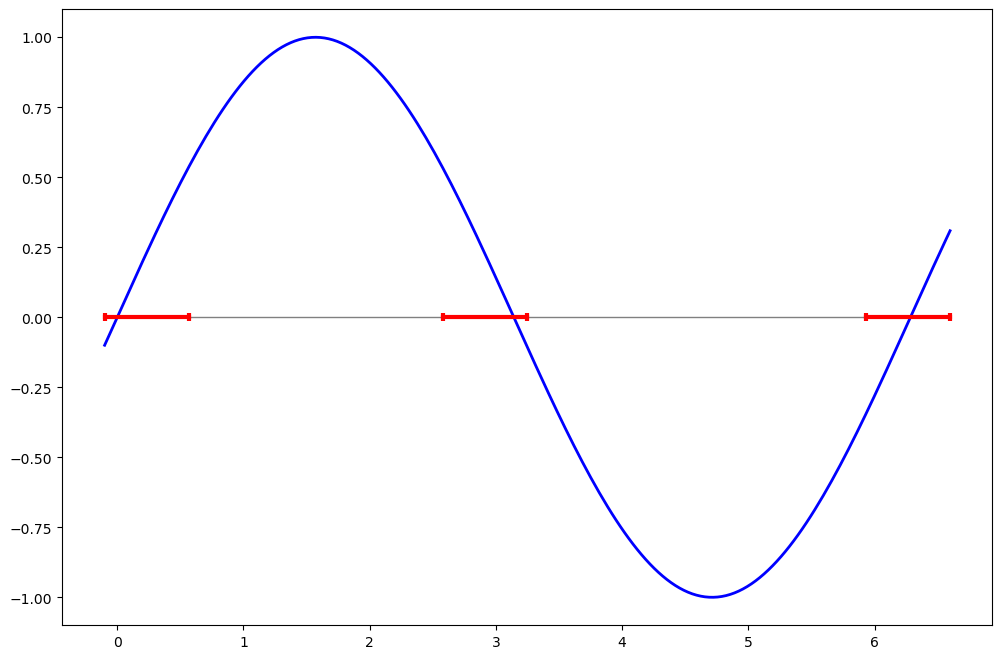

In [6]:
x=np.linspace(a,b,201)
y=root_f(x)

plt.figure(figsize=(12,8))
plt.plot([a,b],[0,0],linewidth=1,color='gray')
plt.plot(x,y,linewidth=2,color='blue')
for i in range(len(xb1)):
    plt.plot([xb1[i],xb2[i]],[0,0],linewidth=3,color='red')
    plt.plot(xb1[i],[0],marker='|',markeredgewidth=3,color='red')
    plt.plot(xb2[i],[0],marker='|',markeredgewidth=3,color='red')

## Use with weird function ...

In [8]:
import warnings
warnings.filterwarnings('ignore')

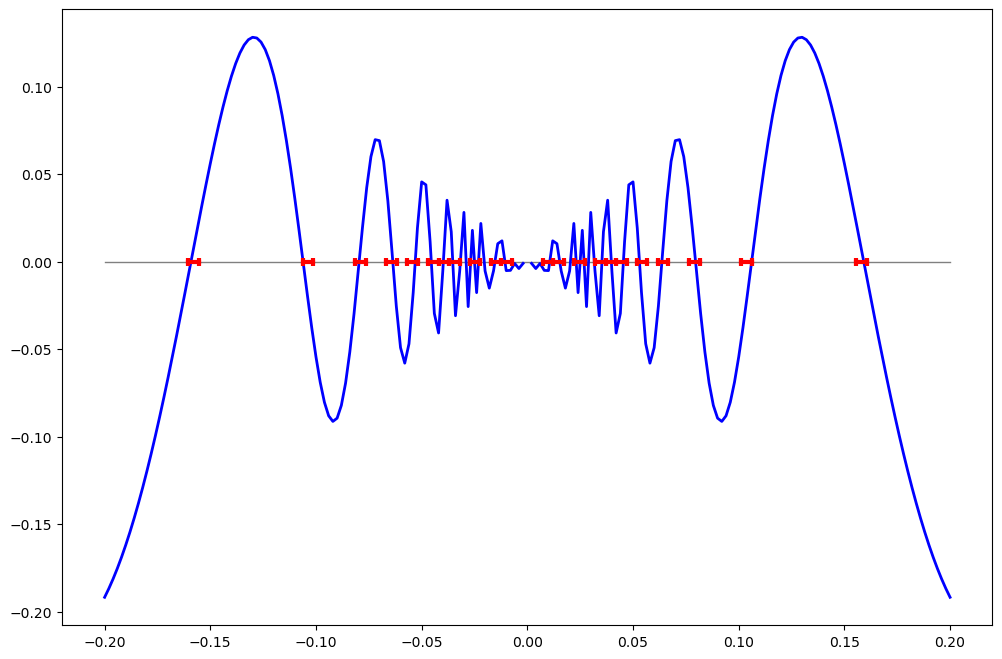

In [11]:
# define function
def root_f(x):
    y = x*np.sin(1/x)
    return y

# define interval and sub-division
a   = -0.2
b   =  0.2
n   = 81
nb  = 0

# find possible intervals
[xb1,xb2,nb] = root_bracket(root_f,a,b,n)

# plot
x=np.linspace(a,b,201)
y=root_f(x)
plt.figure(figsize=(12,8))
#plt.ylim([-2,2])
plt.plot([a,b],[0,0],linewidth=1,color='gray')
plt.plot(x,y,linewidth=2,color='blue')
for i in range(len(xb1)):
    plt.plot([xb1[i],xb2[i]],[0,0],linewidth=3,color='red')
    plt.plot(xb1[i],[0],marker='|',markeredgewidth=3,color='red')
    plt.plot(xb2[i],[0],marker='|',markeredgewidth=3,color='red')

----
[next >](Numerics_lab03_bisection.ipynb)